# Supervised Learning with ```scikit-learn```

## Chapter 4

In [170]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [144]:
music_clean_df = pd.read_csv('music_clean.csv',index_col=[0])
music_clean_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [145]:
print(music_clean_df.columns)
print(music_clean_df.info())

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 36506 to 18960
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
me

In [146]:
music_genre_df = pd.read_csv("music_genre.csv", index_col=0)
music_genre_df.rename(columns={"music_genre": "genre"}, inplace=True)
music_genre_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,genre
instance_id,,,,,,,,,,,,,,,,,
32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop


In [147]:
print(music_genre_df.columns)
print(music_genre_df.info())

Index(['artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date',
       'valence', 'genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 50005 entries, 32894.0 to 63470.0
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   track_name        50000 non-null  object 
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  object 
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  m

In [148]:
music_genre_df.drop(columns=["artist_name", "track_name", "key", "mode", "obtained_date"], inplace=True)
print(music_genre_df.columns)
print(music_genre_df.info())

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 50005 entries, 32894.0 to 63470.0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   liveness          50000 non-null  float64
 7   loudness          50000 non-null  float64
 8   speechiness       50000 non-null  float64
 9   tempo             50000 non-null  object 
 10  valence           50000 non-null  float64
 11  genre             50000 non-null  object 
dtypes: float64(10), object

In [149]:
music_genre_df["genre"].unique()

array(['Electronic', 'Anime', nan, 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [150]:
# music_genre_df = music_genre_df[~music_genre_df["tempo"].isna()]
music_genre_df = music_genre_df[music_genre_df["tempo"] != "?"]
music_genre_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
instance_id,,,,,,,,,,,,
32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,Electronic
46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic
30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,Electronic
62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,Electronic
24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
58878.0,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,98.02799999999999,0.330,Hip-Hop
43557.0,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,122.04299999999999,0.113,Hip-Hop
39767.0,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop


In [151]:
music_genre_df["tempo"] = music_genre_df["tempo"].astype(float)
print(music_genre_df.columns)
print(music_genre_df.info())

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 45025 entries, 32894.0 to 63470.0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45020 non-null  float64
 1   acousticness      45020 non-null  float64
 2   danceability      45020 non-null  float64
 3   duration_ms       45020 non-null  float64
 4   energy            45020 non-null  float64
 5   instrumentalness  45020 non-null  float64
 6   liveness          45020 non-null  float64
 7   loudness          45020 non-null  float64
 8   speechiness       45020 non-null  float64
 9   tempo             45020 non-null  float64
 10  valence           45020 non-null  float64
 11  genre             45020 non-null  object 
dtypes: float64(11), object

C:\Users\rpitc\AppData\Local\Temp\ipykernel_22584\541041717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_genre_df["tempo"] = music_genre_df["tempo"].astype(float)


In [152]:
music_df = music_genre_df.sample(1000)
music_df.reset_index(drop=True, inplace=True)

print(music_df.columns)
print(music_df.info())

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
me

In [153]:
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,55.0,0.000221,0.392,266387.0,0.936,0.839000,0.407,-6.532,0.0849,167.333,0.5640,Classical
1,53.0,0.413000,0.876,230326.0,0.574,0.000184,0.190,-5.442,0.0694,96.002,0.6470,Electronic
2,43.0,0.000446,0.290,-1.0,0.938,0.890000,0.545,-7.082,0.1080,120.488,0.1960,Classical
3,48.0,0.006450,0.657,294000.0,0.873,0.101000,0.133,-3.780,0.0728,150.053,0.3190,Electronic
4,37.0,0.000542,0.576,172990.0,0.952,0.000000,0.350,-4.516,0.1100,149.860,0.5520,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
995,42.0,0.018200,0.537,-1.0,0.925,0.000003,0.165,-2.952,0.0588,134.023,0.5310,Anime
996,30.0,0.104000,0.251,210307.0,0.518,0.007830,0.318,-9.161,0.0455,185.639,0.0388,Blues
997,43.0,0.207000,0.632,165267.0,0.834,0.000000,0.236,-3.880,0.0440,111.990,0.6540,Country
998,51.0,0.006860,0.501,211093.0,0.927,0.000000,0.131,-4.580,0.0292,139.961,0.6110,Alternative


In [154]:
music_dummies = pd.get_dummies(music_df["genre"], drop_first=True, dtype=int)
music_dummies

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,0,0
996,0,1,0,0,0,0,0,0,0
997,0,0,0,1,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0


In [155]:
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("genre", axis=1)
music_dummies

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,55.0,0.000221,0.392,266387.0,0.936,0.839000,0.407,-6.532,0.0849,167.333,0.5640,0,0,1,0,0,0,0,0,0
1,53.0,0.413000,0.876,230326.0,0.574,0.000184,0.190,-5.442,0.0694,96.002,0.6470,0,0,0,0,1,0,0,0,0
2,43.0,0.000446,0.290,-1.0,0.938,0.890000,0.545,-7.082,0.1080,120.488,0.1960,0,0,1,0,0,0,0,0,0
3,48.0,0.006450,0.657,294000.0,0.873,0.101000,0.133,-3.780,0.0728,150.053,0.3190,0,0,0,0,1,0,0,0,0
4,37.0,0.000542,0.576,172990.0,0.952,0.000000,0.350,-4.516,0.1100,149.860,0.5520,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42.0,0.018200,0.537,-1.0,0.925,0.000003,0.165,-2.952,0.0588,134.023,0.5310,1,0,0,0,0,0,0,0,0
996,30.0,0.104000,0.251,210307.0,0.518,0.007830,0.318,-9.161,0.0455,185.639,0.0388,0,1,0,0,0,0,0,0,0
997,43.0,0.207000,0.632,165267.0,0.834,0.000000,0.236,-3.880,0.0440,111.990,0.6540,0,0,0,1,0,0,0,0,0
998,51.0,0.006860,0.501,211093.0,0.927,0.000000,0.131,-4.580,0.0292,139.961,0.6110,0,0,0,0,0,0,0,0,0


In [156]:
# Create X and y
X = music_dummies.drop(columns=["popularity"])
y = music_dummies["popularity"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 9.448204511668887
Standard Deviation of the target array: 15.522084267262573


In [157]:
music_df = music_clean_df.copy()
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 12)


In [158]:
# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

In [159]:
music_df = music_clean_df.copy()
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(800, 11)
(800,)


In [160]:
# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
knn_scaled = pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_scaled.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[57 47]
 [53 43]]


In [161]:
music_df = music_clean_df.copy()
X = music_df.drop("loudness", axis=1).values
y = music_df["loudness"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(800, 11)
(800,)


In [162]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.7200653029753488


In [163]:
music_df = music_clean_df.copy()
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

In [164]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8625 
 {'logreg__C': 0.15873684210526315}


In [165]:
music_df = music_clean_df.copy()
X = music_df.drop("energy", axis=1).values
y = music_df["energy"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

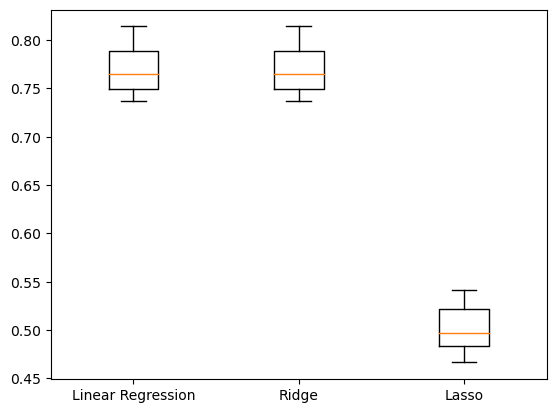

In [166]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [167]:
for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.11109818526605351
Ridge Test Set RMSE: 0.11110048128156673
Lasso Test Set RMSE: 0.1779398662571845


In [171]:
music_df = music_clean_df.copy()
X = music_df.drop("popularity", axis=1).values
y_popularity = music_df["popularity"].values

y_popularity_median = np.median(y_popularity)
y = np.where(y_popularity > y_popularity_median, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

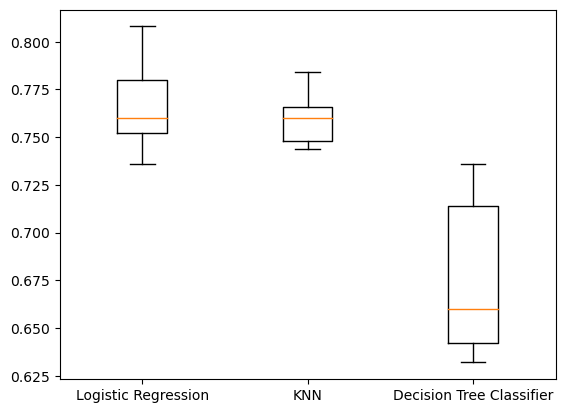

In [172]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [173]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.716
